# Part 1: Data Exploration

In [2]:
import pandas as pd
import numpy as np
from plotnine import*
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split

df = pd.read_csv("/Users/AustinLiu/Desktop/GSB544-ComputingandMachineLearning/Lab_Data/insurance_costs_1.csv")

dummylist = ["sex", "smoker", "region"]
df2 = pd.get_dummies(df, columns = dummylist, prefix = dummylist)
df2

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,1,0,0,1,0,0,0,1
1,33,22.705,21984.47061,0,1,1,0,0,1,0,0
2,32,28.880,3866.85520,0,1,1,0,0,1,0,0
3,31,25.740,3756.62160,1,0,1,0,0,0,1,0
4,60,25.840,28923.13692,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
426,23,33.400,10795.93733,1,0,1,0,0,0,0,1
427,18,31.920,2205.98080,1,0,1,0,1,0,0,0
428,18,36.850,1629.83350,1,0,1,0,0,0,1,0
429,21,25.800,2007.94500,1,0,1,0,0,0,0,1


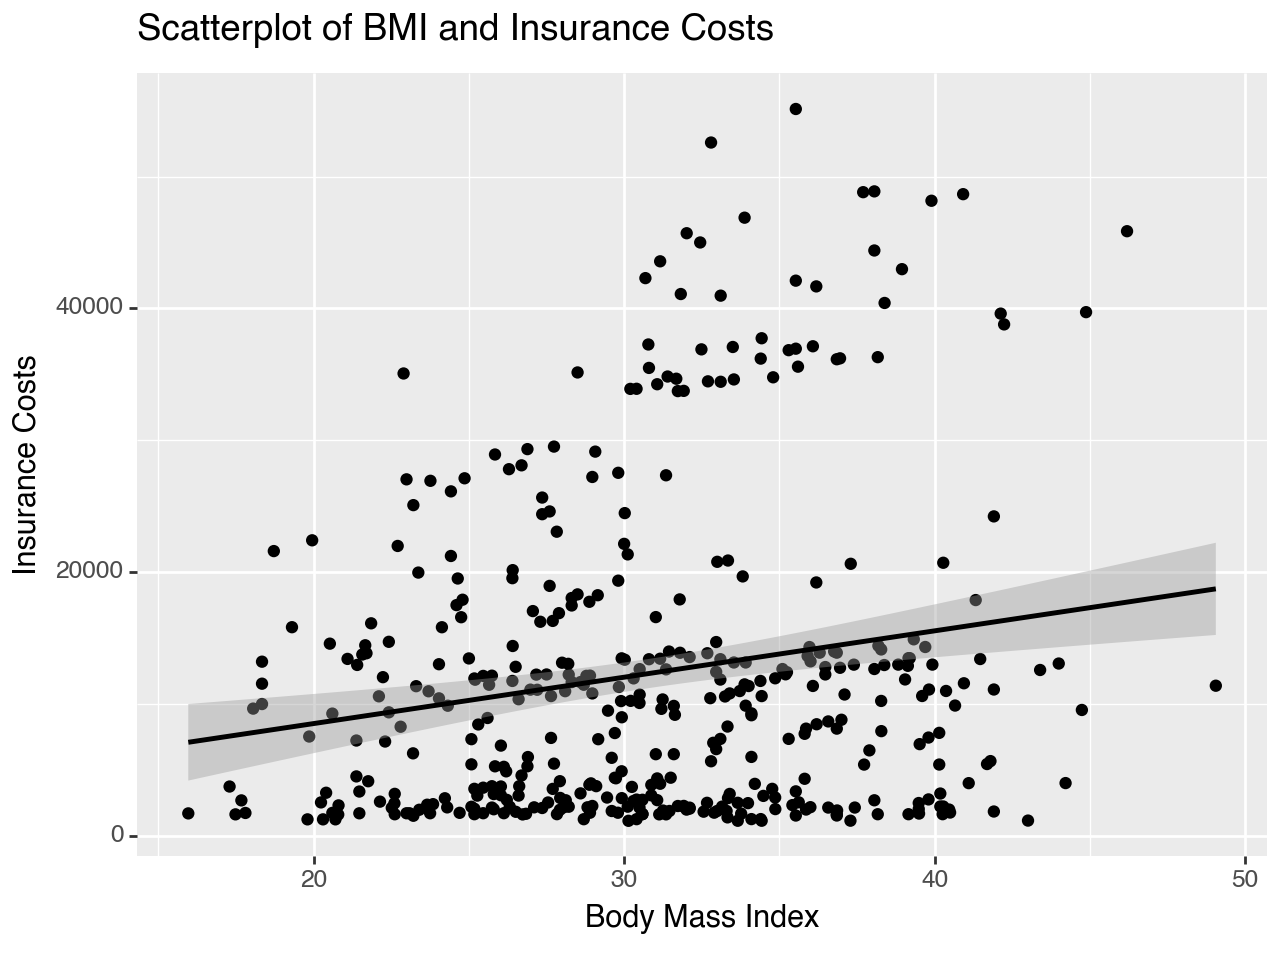

<Figure Size: (640 x 480)>

In [39]:
(ggplot(df, aes(x = "bmi", y = "charges")) 
 + geom_point()
 + geom_smooth(method = "lm")
+ labs(x = "Body Mass Index", 
       y = "Insurance Costs", 
       title = "Scatterplot of BMI and Insurance Costs"))

From this plot, we can see that there is positive correlation between BMI and Insurance Costs. As BMI increases, insurance costs tend to increase.

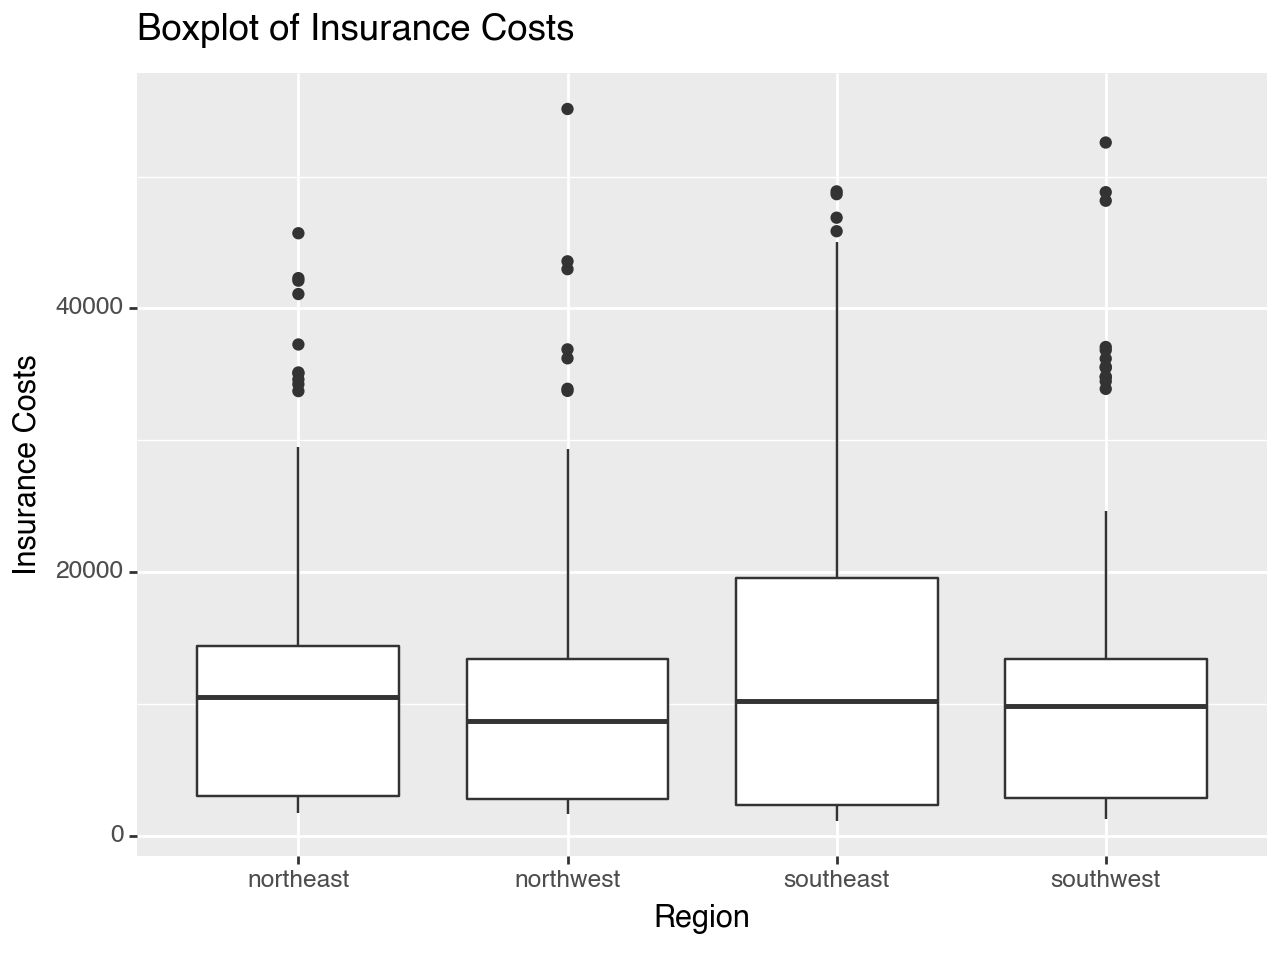

<Figure Size: (640 x 480)>

In [40]:
(ggplot(df, aes(y = "charges", x = "region")) 
+ geom_boxplot()
+ labs(x = "Region", 
       y = "Insurance Costs", 
       title = "Boxplot of Insurance Costs"))


Insurance costs are relatively similar amongst the different regions.

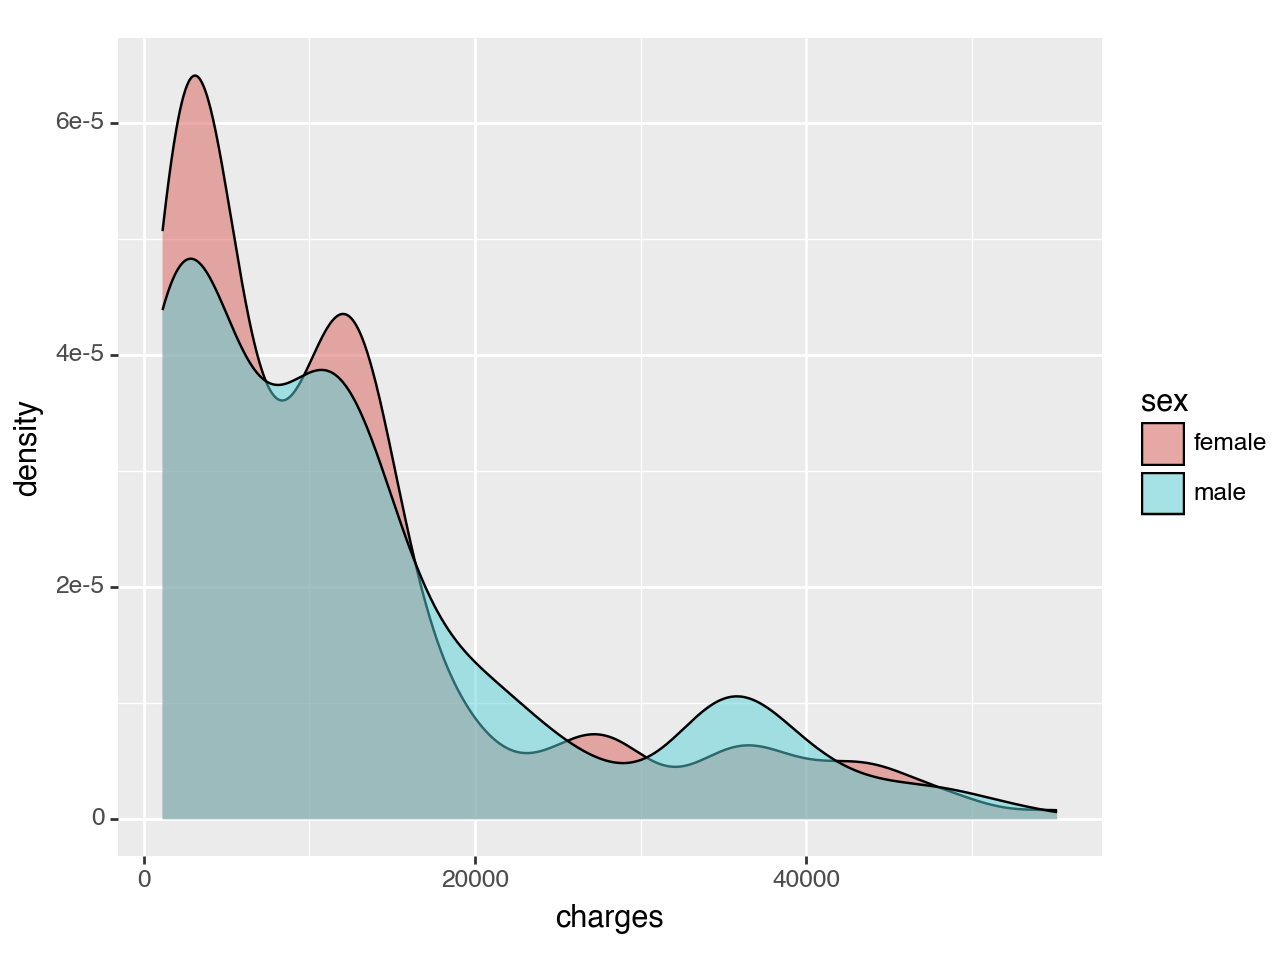

<Figure Size: (640 x 480)>

In [41]:
(ggplot(df, aes(x = "charges", fill = "sex"))
 + geom_density(alpha = 0.5))

Females have a higher density of lower charges, and Males have a higher density of higher charges.

# Part 2: Simple Linear Models

In [49]:
#Question 1
y = df2["charges"]
X = df2[["age"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()

Model = lr.fit(X_train, y_train)
y_pred_lr = Model.predict(X_test)


print(Model.coef_)
print(r2_score(y_test, y_pred_lr))
print(mean_squared_error(y_test, y_pred_lr))

[248.53604493]
0.04161474218633843
123604968.18255652


For every year increase in age, the charges will increase by $248.54.

In [45]:
#Question 2
X1 = df2[["age", "sex_female"]]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.25)

lr = LinearRegression()

Model1 = lr.fit(X_train1, y_train1)
y_pred_lr1 = Model1.predict(X_test1)


print(Model1.coef_)
print(r2_score(y_test1, y_pred_lr1))
print(mean_squared_error(y_test1, y_pred_lr1))

[ 226.07608333 -203.91286996]
0.15549578012006615
83475181.31126861


In [46]:
#Question 3
X2 = df2[["age", "smoker_yes"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.25)

lr = LinearRegression()

Model2 = lr.fit(X_train2, y_train2)
y_pred_lr2 = Model2.predict(X_test2)


print(Model2.coef_)
print(r2_score(y_test2, y_pred_lr2))
print(mean_squared_error(y_test2, y_pred_lr2))

[  246.60521    25526.04651959]
0.6748451765671598
31250732.477413386


Question 4:

MSE <br>
- Model1 (Q2): 83475181.311 <br>
- Model2 (Q3): 31250732.477

R^2 <br>
- Model1 (Q2): 0.155 <br>
- Model2 (Q3): 0.675

Model 2 from Question 3 is the better model, as it has a lower MSE and higher R squared.

# Part 3: Multiple Linear Models

In [47]:
#Question 1
X3 = df2[["age", "bmi"]]


X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.25)

lr = LinearRegression()

Model3 = lr.fit(X_train3, y_train3)
y_pred_lr3 = Model3.predict(X_test3)


print(Model3.coef_)
print(r2_score(y_test3, y_pred_lr3))
print(mean_squared_error(y_test3, y_pred_lr3))

[200.27918848 315.77585927]
0.1319401907243306
121999114.43992148


The 2 models have similar MSE, but we can't compare the R^2 since this model has an extra predictor variable.

In [16]:
df2["age_squared"] = df2['age']**2

In [53]:
#Question 2
X4 = df2[["age", "age_squared"]]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y, test_size=0.25)

lr = LinearRegression()

Model4 = lr.fit(X_train4, y_train4)
y_pred_lr4 = Model4.predict(X_test4)


print(Model4.coef_)
print(r2_score(y_test4, y_pred_lr4))
print(mean_squared_error(y_test4, y_pred_lr4))

[521.18640915  -3.84091374]
0.11242446579486032
122272623.17029789


In [54]:
#Question 3
poly4 = PolynomialFeatures(degree = (1,4), include_bias = False)
X5 = poly4.fit_transform(df2[["age"]])

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y, test_size=0.25)

lr = LinearRegression()

Model5 = lr.fit(X_train5, y_train5)
y_pred_lr5 = Model5.predict(X_test5)


print(Model5.coef_)
print(r2_score(y_test5, y_pred_lr5))
print(mean_squared_error(y_test5, y_pred_lr5))

[-6.29352194e+03  2.90782384e+02 -5.37017478e+00  3.49366980e-02]
0.06063431632419192
170801862.57821012


In [68]:
#Question 4 - Didn't use test_train_split to keep index the same for plotting
poly12 = PolynomialFeatures(degree = (1,12), include_bias = False)
X6 = poly12.fit_transform(df2[["age"]])

lr = LinearRegression()

Model6 = lr.fit(X6, y)
y_pred_lr6 = Model6.predict(X6)

df2["Model 6"] = y_pred_lr6

print(Model6.coef_)
print(r2_score(y, y_pred_lr6))
print(mean_squared_error(y, y_pred_lr6))

[ 2.54286380e-10 -1.95833185e-06  1.68868563e-07  2.93884773e-06
  3.50686557e-05  2.34235887e-04 -2.59619474e-05  1.22811159e-06
 -3.11760233e-08  4.42259624e-10 -3.29943507e-12  1.00713634e-14]
0.10764575300737766
125576221.27331766


Part 3 - Question 5 <br>
MSE <br>
- Model3 (Q1): 121999114.440 <br>
- Model4 (Q2): 122272623.170 <br>
- Model5 (Q3): 170801862.578 <br>
- Model6 (Q4): 125576221.273 <br>

R^2 <br>
- Model3 (Q1): 0.132 <br>
- Model4 (Q2): 0.112 <br>
- Model5 (Q3): 0.061 <br>
- Model6 (Q4): 0.108 <br>

According to the MSE, Model 6 with Degree 12 polynomial. According to the R^2, Model3 with age and bmi as predictors had the highest R^2. Although normally we could not compare R^2 because of different number of predictors, the extra predictors do not increase the R^2 value. 

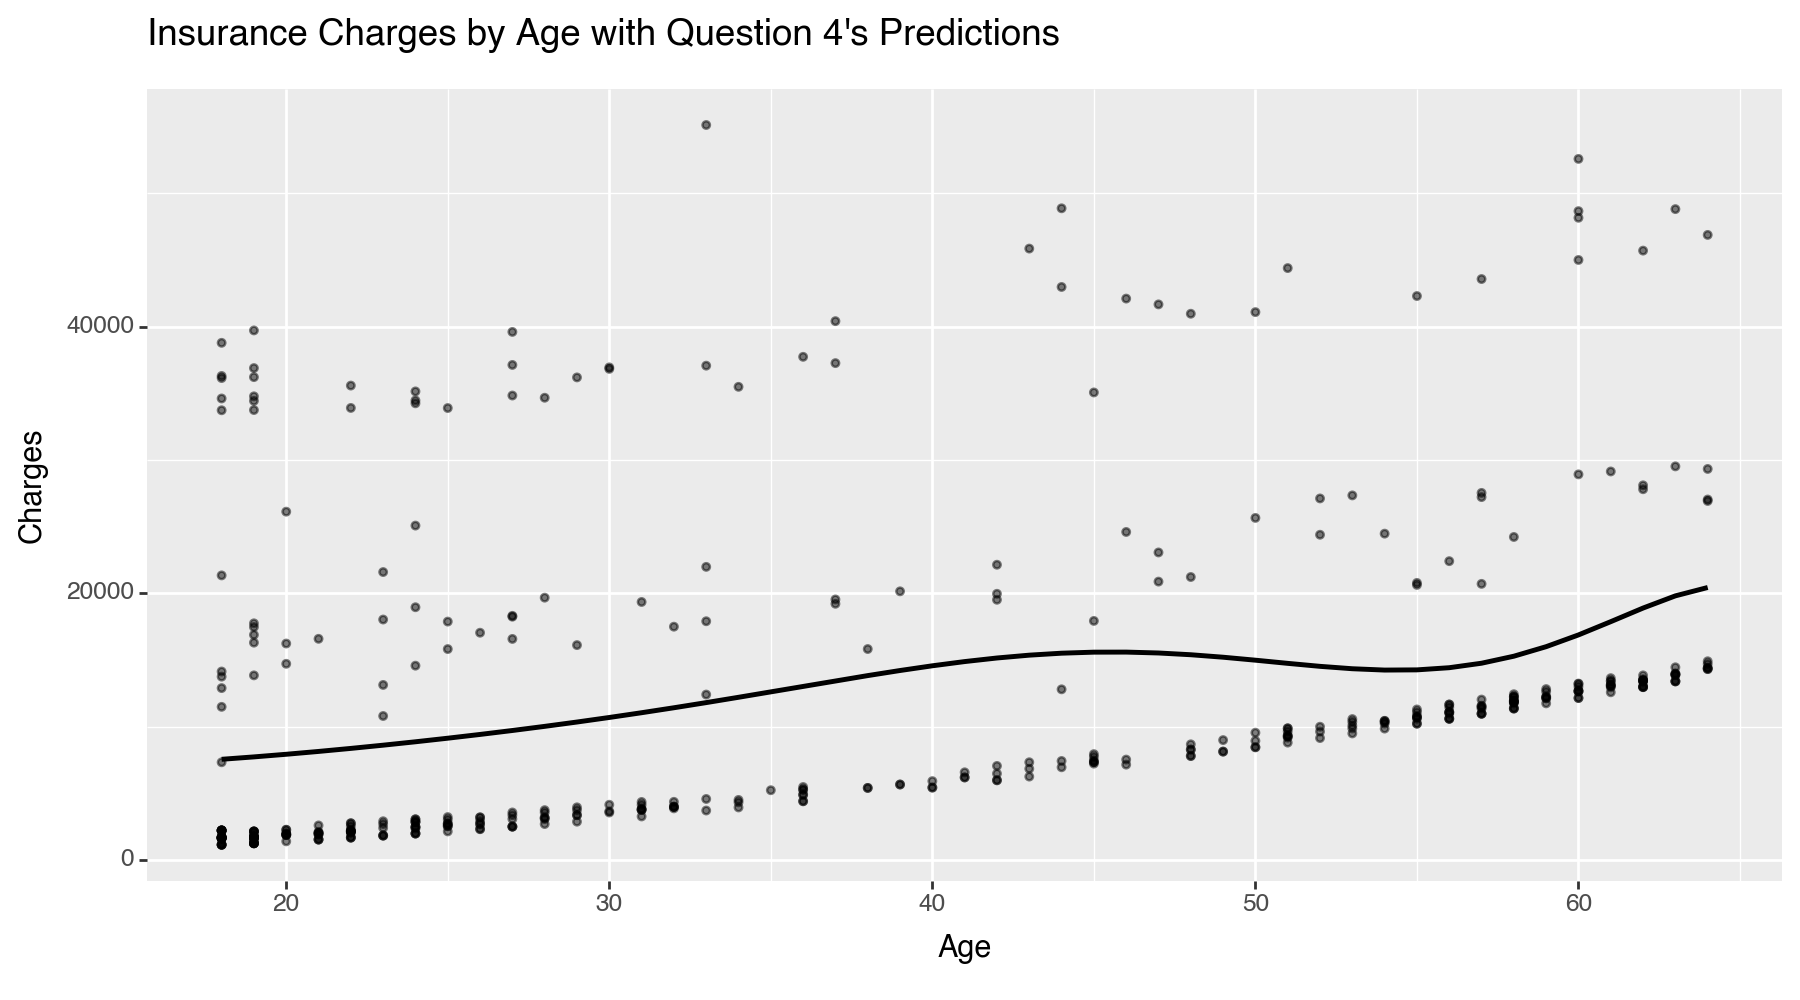

<Figure Size: (900 x 500)>

In [86]:
#Question 6
(ggplot(data = df2)
    + geom_point(aes(x = 'age', y = 'charges'), size=1, alpha=0.5)
    + geom_line(aes(x = 'age', y = 'Model 6'), size=1)
    + labs(x = 'Age', y = 'Charges', title = "Insurance Charges by Age with Question 4's Predictions")
    + theme(figure_size = (9, 5))
    )

# Part 4: New Data

In [3]:
df3 = pd.read_csv("/Users/AustinLiu/Desktop/GSB544-ComputingandMachineLearning/Lab_Data/insurance_costs_2.csv")
df3.head()

dummylist = ["sex", "smoker", "region"]
df4 = pd.get_dummies(df3, columns = dummylist, prefix = dummylist)
df4

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,23,34.400,1826.84300,0,1,1,0,0,0,0,1
1,56,40.300,10602.38500,0,1,1,0,0,0,0,1
2,18,34.100,1137.01100,0,1,1,0,0,0,1,0
3,63,23.085,14451.83515,1,0,1,0,1,0,0,0
4,63,28.310,13770.09790,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
138,19,34.900,34828.65400,0,1,0,1,0,0,0,1
139,45,30.360,62592.87309,0,1,0,1,0,0,1,0
140,43,27.800,37829.72420,0,1,0,1,0,0,0,1
141,24,27.720,2464.61880,1,0,1,0,0,0,1,0


In [4]:
#Only Age
yfit = df2["charges"]
Xfit = df2[["age"]]

ypred = df4["charges"]
Xpred = df4[["age"]]

lr = LinearRegression()

Model = lr.fit(Xfit, yfit)
y_pred_lr = Model.predict(Xpred)

print(mean_squared_error(ypred, y_pred_lr))

136077136.50195494


In [95]:
#Age and BMI
Xfit1 = df2[["age", "bmi"]]

Xpred1 = df4[["age", "bmi"]]

lr = LinearRegression()

Model1 = lr.fit(Xfit1, yfit)

y_pred_lr1 = Model1.predict(Xpred1)

print(mean_squared_error(ypred, y_pred_lr1))

132636406.11081287


In [96]:
#Age, BMI, Smoker
Xfit2 = df2[["age", "bmi", "smoker_yes"]]

Xpred2 = df4[["age", "bmi", "smoker_yes"]]

lr = LinearRegression()

Model2 = lr.fit(Xfit2, yfit)

y_pred_lr1 = Model2.predict(Xpred2)

print(mean_squared_error(ypred, y_pred_lr1))

35377541.2414163


In [6]:
df2["Age * Smoker"] = df2["age"] * df2["smoker_yes"]
df2["BMI * Smoker"] = df2["bmi"] * df2["smoker_yes"]

df4["Age * Smoker"] = df4["age"] * df4["smoker_yes"]
df4["BMI * Smoker"] = df4["bmi"] * df4["smoker_yes"]

In [7]:
#Age, BMI, (Age + BMI)*Smoker
Xfit3 = df2[["age", "bmi", "Age * Smoker", "BMI * Smoker"]]
Xpred3 = df4[["age", "bmi", "Age * Smoker", "BMI * Smoker"]]

lr = LinearRegression()

Model3 = lr.fit(Xfit3, yfit)

y_pred_lr3 = Model3.predict(Xpred3)

print(mean_squared_error(ypred, y_pred_lr3))

24795908.41264334


In [8]:
#Age, BMI, Smoker, (Age + BMI)*Smoker
Xfit4 = df2[["age", "bmi", "smoker_yes","Age * Smoker", "BMI * Smoker"]]
Xpred4 = df4[["age", "bmi", "smoker_yes","Age * Smoker", "BMI * Smoker"]]

lr = LinearRegression()

Model4 = lr.fit(Xfit4, yfit)

y_pred_lr4 = Model4.predict(Xpred4)

print(mean_squared_error(ypred, y_pred_lr4))

21786256.86685248


According to the MSE of these models fitted on the first dataset and predicted on the second dataset, the last model with age, BMI, smoker, and the interactions is the best. 

In [9]:
df4["Residuals"] = df4["charges"] - pd.Series(y_pred_lr4)

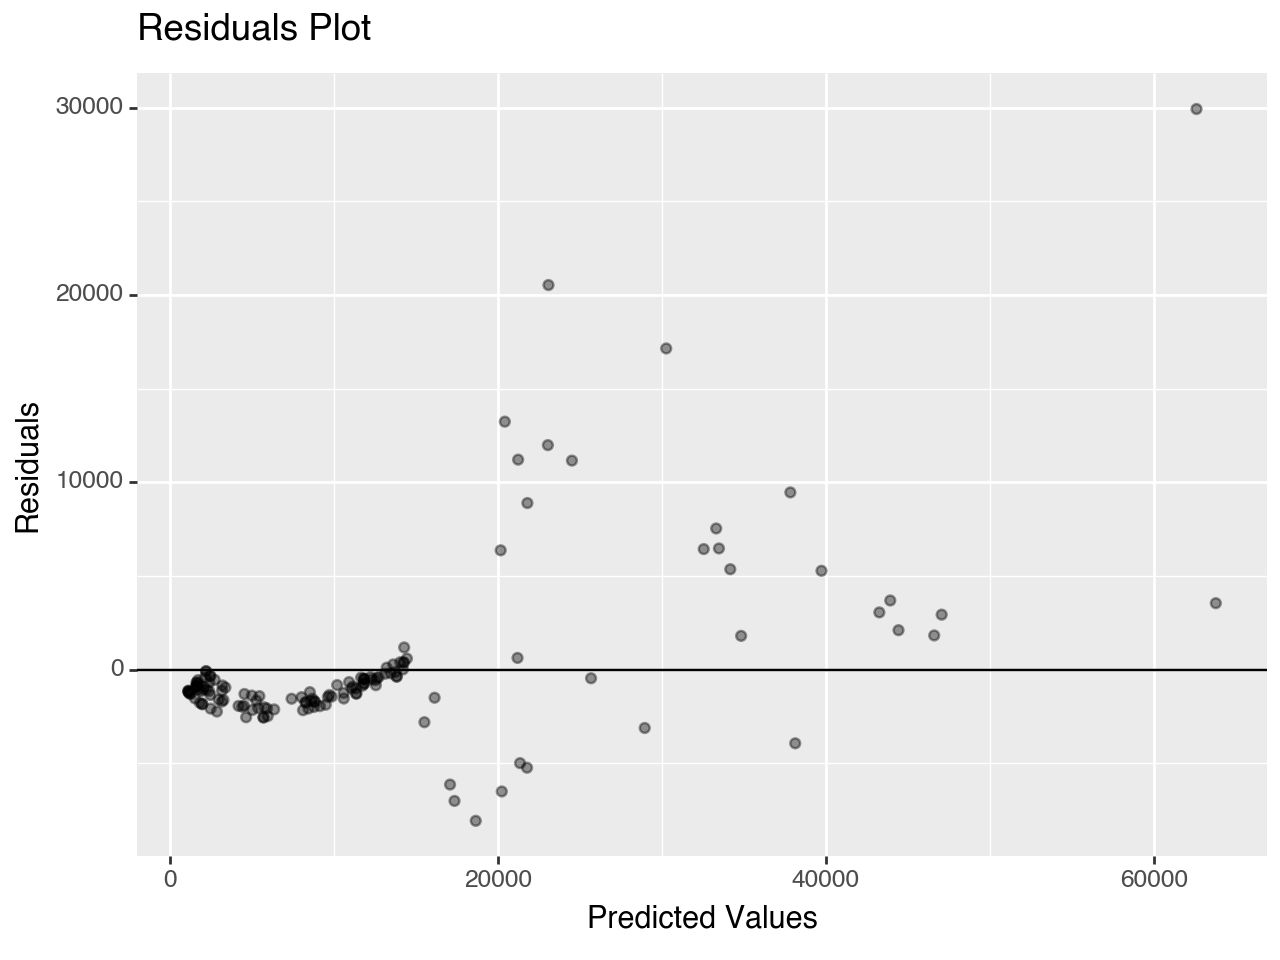

<Figure Size: (640 x 480)>

In [10]:
(ggplot(df4, aes(x = "charges", y = 'Residuals')) 
 + geom_point(alpha = 0.4) 
 + geom_hline(yintercept = 0) 
 + labs(x = 'Predicted Values', y = 'Residuals', title = 'Residuals Plot')
)

# Part 5: Full Exploration

In [11]:
#Age, BMI, Smoker, (Age + BMI)*Smoker, & Region
ypred = df4["charges"]
yfit = df2["charges"]

Xfit5 = df2[["age", "bmi", 
             "smoker_yes", 
             "region_southwest", 
             "region_northwest",
             "region_northeast",
             "Age * Smoker", 
             "BMI * Smoker"]]
Xpred5 = df4[["age", "bmi", "smoker_yes",
              "region_southwest", 
              "region_northwest",
              "region_northeast",
              "Age * Smoker", 
              "BMI * Smoker"]]

lr = LinearRegression()

Model5 = lr.fit(Xfit5, yfit)

y_pred_lr5 = Model5.predict(Xpred5)

print(mean_squared_error(ypred, y_pred_lr5))

22245634.34988404


In [18]:
df4["age_squared"] = df4["age"]**2


In [17]:
#Age, BMI, Smoker, (Age + BMI)*Smoker, & Age^2

Xfit6 = df2[["age", "bmi", "smoker_yes","Age * Smoker", "BMI * Smoker", "age_squared"]]
Xpred6 = df4[["age", "bmi", "smoker_yes","Age * Smoker", "BMI * Smoker", "age_squared"]]

lr = LinearRegression()

Model6 = lr.fit(Xfit6, yfit)

y_pred_lr6 = Model6.predict(Xpred6)

print(mean_squared_error(ypred, y_pred_lr6))

21691084.30556854


In [19]:
#Age, BMI, Smoker, (Age + BMI)*Smoker, & Age^2, BMI^2
df4["bmi_squared"] = df4["bmi"]**2
df2["bmi_squared"] = df2["bmi"]**2

Xfit7 = df2[["age", "bmi", "smoker_yes","Age * Smoker", "BMI * Smoker", "age_squared", "bmi_squared"]]
Xpred7 = df4[["age", "bmi", "smoker_yes","Age * Smoker", "BMI * Smoker", "age_squared", "bmi_squared"]]

lr = LinearRegression()

Model7 = lr.fit(Xfit7, yfit)

y_pred_lr7 = Model7.predict(Xpred7)

print(mean_squared_error(ypred, y_pred_lr7))

21530779.445070773


Using the above model, Model 7 since it has the lowest MSE of the 4 new tested.

In [23]:
#Age, BMI, Smoker, (Age + BMI)*Smoker, & Age^2, BMI^2, Age*BMI
df4["age * bmi"] = df4["bmi"]* df4["age"]
df2["age * bmi"] = df2["bmi"]* df2["age"]

Xfit8 = df2[["age", "bmi","smoker_yes","Age * Smoker", "BMI * Smoker", "age_squared", "bmi_squared", "age * bmi"]]
Xpred8 = df4[["age", "bmi", "smoker_yes","Age * Smoker", "BMI * Smoker", "age_squared", "bmi_squared", "age * bmi"]]

lr = LinearRegression()

Model8 = lr.fit(Xfit8, yfit)

y_pred_lr8 = Model8.predict(Xpred8)

print(mean_squared_error(ypred, y_pred_lr8))

21532023.680487406


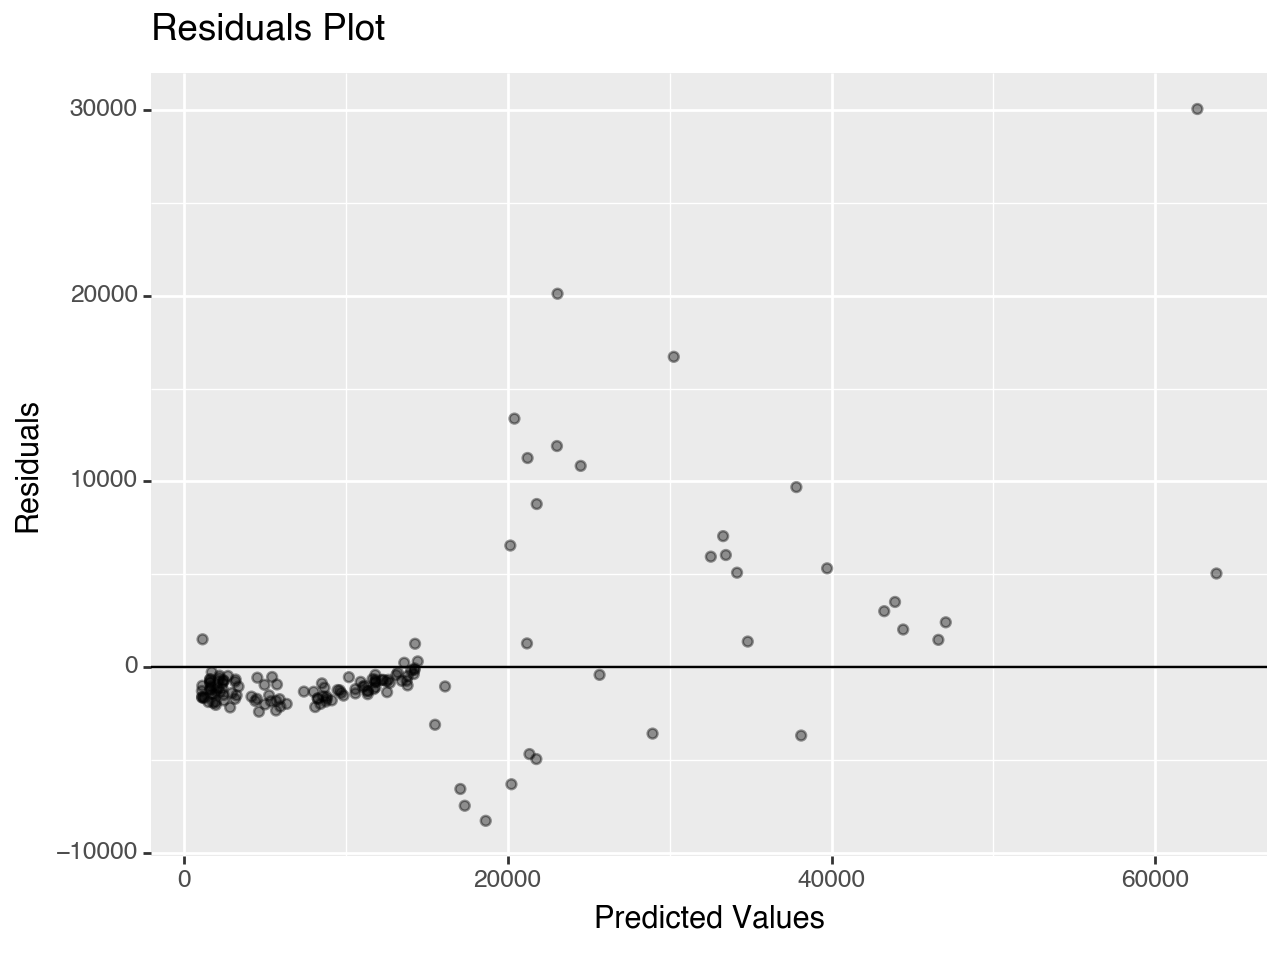

<Figure Size: (640 x 480)>

In [24]:
df4["ResidualsP2"] = df4["charges"] - pd.Series(y_pred_lr7)

(ggplot(df4, aes(x = "charges", y = 'ResidualsP2')) 
 + geom_point(alpha = 0.4) 
 + geom_hline(yintercept = 0) 
 + labs(x = 'Predicted Values', y = 'Residuals', title = 'Residuals Plot')
)